# MACHINE LEARNING COURSE PART 2 : IRIS 

<p>Organized by : <b>MACHINE LEARNING ID LOMBOK</b> </p>

### Import library-library yang dibutuhkan
<p>pandas ==> untuk keperluan manipulasi data <br>
numpy ==> komputasi scientific (numerical computational)</p>

In [1]:
# library untuk manipulasi struk data / dataset
import pandas as pd

# library untuk komputasi numerik (numerical computation)
import numpy as np

### Download dataset

In [2]:
# download datasetnya. jangan lupa gunakan tanda seru di awal sintak untuk memulai perintah command line prompt. 
!wget https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv

--2018-12-20 21:46:53--  https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.8.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3,8K) [text/plain]
Saving to: ‘iris.csv.1’

iris.csv.1          100%[===================>]   3,77K  --.-KB/s    in 0,05s   

2018-12-20 21:46:54 (71,2 KB/s) - ‘iris.csv.1’ saved [3858/3858]



### import dataset yang sudah didownload tadi
<p>pd.read_csv() ==> untuk membaca file csv (dataset) <br>
data.head() ==> untuk melihat 5 baris pertama dari dataset <br></p>

In [3]:
# tentukan file dataset 
file_path = 'iris.csv'

# baca dataset (format csv)
data = pd.read_csv(file_path)

# lihat ukuran / dimensi dataset yang digunakan
print('ukuran data ==> ',data.shape[0], ' baris ; ', data.shape[1], ' kolom\n')

# lihat 5 baris pertama dari isi datasetnya
data.head()

ukuran data ==>  150  baris ;  5  kolom



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Lihat sedikit lebih dalan datanya (simple exploration)

In [4]:
# tampilkan summary statistiknya
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# pisahkan setiap kolomnya
sepal_length = data[['sepal_length']]
sepal_width = data[['sepal_width']]
petal_length = data[['petal_length']]
petal_width = data[['petal_width']]
species = data[['species']]

In [6]:
# visualisasikan
import matplotlib.pyplot as plt
var_col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i,j in enumerate(var_col):
    plt.figure(figsize=[10,10])
    plt.subplot(5,1,i+1)
    plt.plot(data[[j]])

### Pecah dataset menjadi X (input) dan Y (target)
<p> feature 'species'  merupakan variabel Y / target yang akan diprediksi <br> selain feature 'species' merupakan variabel x yang digunakan sebagai masukan untuk membuat model </p>

In [7]:
# tentukan variabel masukan
X = data.iloc[:, :-1].values

# tentukan variabel yang akan diprediksi (target)
Y = data.iloc[:, -1:].values

# lihat datanya untuk variabel X 
print('X ==> \n', X[:5], '\n')

# lihat datanya untuk variabel Y
print('Y ==> \n', Y[:5])

X ==> 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 

Y ==> 
 [['setosa']
 ['setosa']
 ['setosa']
 ['setosa']
 ['setosa']]


In [8]:
# import methode labelbinarizer untuk melakukan teknik one-hot encoding
from sklearn.preprocessing import LabelBinarizer

# Membuat objek konstruktor nya
lb = LabelBinarizer()

# memulai one-hot encoding dengan menggunakan objek konstruktor tadi
Y = lb.fit_transform(Y)

# lihat data labelnya
Y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [9]:
# OPTIONAL
# from sklearn.preprocessing import MinMaxScaler
# scale = MinMaxScaler(feature_range=(0,1))
# X = scale.fit_transform(X)

### Bagi dataset menjadi 2 bagian yaitu : bagian training dan bagian validasi
<p>sebagai contoh ==> rasio pembagian antara training dan validasi secara berturut-turut ==> 70% : 30% </p>

<h4>1) bagian train</h4>
<li>X Train</li>
<li>Y Train</li>
<h4>2) bagian Test</h4>
<li>X Test</li>
<li>Y Test</li>
<h5>X = data input ; Y = label/output</h5>

In [10]:
# Menggunakan metode pemecahan dataset dengan train_test_split
from sklearn.model_selection import train_test_split

# memcah dataset dengan rasio jumlah data testing sebesar 30 %
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# validasi ukurannya apakah bener atau tidak...
print('x_train ==>',x_train.shape)
print('y_train ==>',y_train.shape)
print('x_test  ==>',x_test.shape)
print('y_test  ==>',y_test.shape)

x_train ==> (105, 4)
y_train ==> (105, 3)
x_test  ==> (45, 4)
y_test  ==> (45, 3)


### import library keras berupa layers dan modelnya
<p> library inti ==> keras.layers dan keras.models <br>
keras.layers terdiri atas layer-layer yang dibutuhkan untuk membangung jaringan syaraf tiruan (ML) seperti fully connected layer (Dense layer), conv layer dll
</p>

In [11]:
# masukan library keras
import keras

# kita gunakan linear layer (dense layer) untuk membangun NN
from keras.layers import Dense

# menggunakan Model sebagai cara menentukan / membangun NN
from keras.models import Model, Input

Using TensorFlow backend.


### Rancang dan bangung arsitekrut NN-nya
<p>
Arsitektur NN yang dibangun terdiri atas : <br/>
    <li>sebuah input layer yang memiliki node 4</li>
    <li> sebuah output layer yang akan diprediksi, terdiri atas 3 node</li>
    <li>tiga buah hidden layer dengan jumlah node masing-masing sebanyak, 50, 100 dan 50</li>
</p>

In [12]:
# tentukan jumlah node pada inputan
# jumlah node = jumlah feature pada dataset iris
data_input = 4

#tentukan jumlah node pada output layer yang akan diprediksi
# jumlah kelas/nilai yang akan diprediksi adalah sebanyak 3 pada iris
data_output = 3

# feed inputannya
input_layer = Input(shape=(data_input,), dtype='float')

# buat hidden layer ke-1 dengan jumlah node sebanyak 50
hidden_1 = Dense(50, activation='relu', name='hidden_1')(input_layer)

#buat hidden layer ke-2 dengan jumlah node sebanyak 100
hidden_2 = Dense(100, activation='relu', name='hidden_2')(hidden_1)

# buat hidden layer ke-3 dengan jumlah node sebanyak 50
hidden_3 = Dense(50, activation='relu', name='hidden_3')(hidden_2)

# membuat output layer dengan jumlah node sebanyak data_output (3)
output_layer = Dense(data_output, activation='softmax')(hidden_3)

# membuat modelnya dengan memasukan input dan outputnya
iris_model = Model(inputs=input_layer, outputs=output_layer)

#menampilkan summary / ringkasan model yang telah dibangun
iris_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
hidden_1 (Dense)             (None, 50)                250       
_________________________________________________________________
hidden_2 (Dense)             (None, 100)               5100      
_________________________________________________________________
hidden_3 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 153       
Total params: 10,553
Trainable params: 10,553
Non-trainable params: 0
_________________________________________________________________


### menentukan jenis fungsi loss, jenis optimizer dan metriks pengukuran hasil training

In [13]:
iris_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# tentukan jumlah iterasi / perulangan pembelajaran yang digunakan
iterasi = 100

# tentukan jumlah data yang akan dimasukan ke dalam NN setiap satu iterasi
my_batch_size = 10

# memulai training dengan inputan x_train dan y_train
history = iris_model.fit(x=x_train, y=y_train, 
                         batch_size=my_batch_size, 
                         epochs=iterasi, 
                         validation_data=[x_test, y_test])

Train on 105 samples, validate on 45 samples
Epoch 1/100
105/105 [==============================] - 2s 15ms/step - loss: 0.9977 - acc: 0.6476 - val_loss: 0.7851 - val_acc: 0.9778
Epoch 2/100
105/105 [==============================] - 0s 345us/step - loss: 0.7238 - acc: 0.7048 - val_loss: 0.5607 - val_acc: 0.7778
Epoch 3/100
105/105 [==============================] - 0s 386us/step - loss: 0.5591 - acc: 0.8286 - val_loss: 0.4165 - val_acc: 0.8667
Epoch 4/100
105/105 [==============================] - 0s 362us/step - loss: 0.4470 - acc: 0.8476 - val_loss: 0.3250 - val_acc: 0.9778
Epoch 5/100
105/105 [==============================] - 0s 272us/step - loss: 0.3771 - acc: 0.9238 - val_loss: 0.2596 - val_acc: 0.9778
Epoch 6/100
105/105 [==============================] - 0s 320us/step - loss: 0.2999 - acc: 0.9429 - val_loss: 0.2129 - val_acc: 1.0000
Epoch 7/100
105/105 [==============================] - 0s 381us/step - loss: 0.2444 - acc: 0.9714 - val_loss: 0.2101 - val_acc: 0.9111
Epoch 8/100

In [15]:
# melihat nilai loss dan akurasi. metode evaluate menghasilkan dua keluaran yaitu loss dan acc
nilai_loss, nilai_acc = iris_model.evaluate(x=x_test, y=y_test)

# lihat nilai loss akhir
print('loss    = ', nilai_loss)

#melihat nilai akurasi akhir
print('akurasi = ', nilai_acc)

45/45 [==============================] - 0s 128us/step
loss    =  0.04278765882158445
akurasi =  0.9777777777777777


In [16]:
# nilai-nilai loss-nya
loss = history.history['loss']

# nilai-nilai val_loss-nya
val_loss = history.history['val_loss']

# nilai-nilai akurasi-nya
acc = history.history['acc']

# nilai-nilai val_acc-nya
val_acc = history.history['val_acc']

# menentukan sumbu x nya dari 0 sampai dengan banyaknya jumlah nilai loss/acc
sumbu_x = np.arange(0, len(loss))

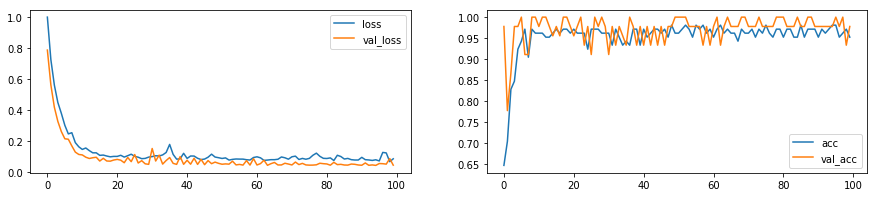

In [17]:
# memasukan library plotting (matplotlib)
import matplotlib.pyplot as plt

# grafik plot untuk melihat loss
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(sumbu_x, loss, label='loss')
plt.plot(sumbu_x, val_loss, label='val_loss')
plt.legend()

# grafik plot untuk melihat akurasinya
plt.subplot(1,2,2)
plt.plot(sumbu_x, acc, label='acc')
plt.plot(sumbu_x, val_acc, label='val_acc')
plt.legend()
plt.show()

### Laporan Pengujian (evaluation)

In [18]:
# memasukan library/method untuk pengukuran kinerja model
from sklearn.metrics import classification_report

# melakukan prediksi dan hasil prediksi ditampung di dalam variabel "prediksi"
prediksi = iris_model.predict(x_test).argmax(axis = 1)

# melihat hasil kinerja klasifikasi/model
print(classification_report(y_true=y_test.argmax(axis=1), y_pred=prediksi, target_names=lb.classes_))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



### Simpan Model dan label serta export data testing

In [19]:
# simpan model neural network 
iris_model.save('iris_model.h5')

# simpan label class-nya
import pickle
label = open('label.pickle', 'wb')
label.write(pickle.dumps(lb))
label.close()

# gunakan file data ini sebagai inputan untuk melakukan prediksi di file 'iris_predict.ipynb' 
pd.DataFrame(x_test, columns=data.columns[:-1]).to_csv('data_testing.csv')

In [20]:
pd.read_csv('data_testing.csv', index_col=0)

,sepal_length,sepal_width,petal_length,petal_width
0,6.1,2.8,4.7,1.2
1,5.7,3.8,1.7,0.3
2,7.7,2.6,6.9,2.3
3,6.0,2.9,4.5,1.5
4,6.8,2.8,4.8,1.4
5,5.4,3.4,1.5,0.4
6,5.6,2.9,3.6,1.3
7,6.9,3.1,5.1,2.3
8,6.2,2.2,4.5,1.5
9,5.8,2.7,3.9,1.2
